In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import m2cgen as m2c
import joblib
import pickle
import glob
import sys


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

print("done")



done


# Preprocessing



In [4]:
# Import data to use as training data

dataframes_in = []
dataframes_out = []
files = glob.glob("clean_csv/*.csv")
print(files)
for filename in files:
    if "in-" in filename:
        dataframes_in.append(pd.read_csv(filename))
    else:
        dataframes_out.append(pd.read_csv(filename))

in_data = pd.concat(dataframes_in)
out_data = pd.concat(dataframes_out)

print(in_data.head())

print(out_data.head())

['clean_csv\\0001-in-bus-window.csv', 'clean_csv\\0002-in-takapuna-library-children.csv', 'clean_csv\\0003-in-takapuna-library-general.csv', 'clean_csv\\0004-in-takapuna-library-window.csv', 'clean_csv\\1001-out-cbd-walk.csv', 'clean_csv\\1002-out-walk-primary.csv', 'clean_csv\\1003-out-park.csv', 'clean_csv\\1004-out-tree-shade.csv', 'clean_csv\\1005-out-walk-primary.csv', 'clean_csv\\1006-out-takapuna-cbd.csv']
    timestamp  uv  light  accelX  accelY  accelZ    r    g    b     c  \
0  1712470902   0    247    -487    1873    6644  127  142  175   356   
1  1712470906   0    246   -1746   -1469    8748  335  501  464  1319   
2  1712470908   1    276   -2418     295    8408   67  113  118   298   
3  1712470910   0    253   -1215    -245    7452    9   11   12    25   
4  1712470912   0    249   -3068    -286    6818   31   37   39    78   

   colorTemp  lux  target  code  
0       7404   54     NaN   NaN  
1       6668  342     NaN   NaN  
2       8101   70     NaN   NaN  
3       

In [5]:
in_data["target"] = 0
out_data["target"] = 1

all_data = pd.concat([in_data, out_data])

# Data Imbalance Check
There are 166 indoor and 14 outdoor samples in the dataset. The data is not balanced.

In [10]:
print(all_data["target"].value_counts())

X = all_data.drop(['timestamp', 'target', 'code', 'light'], axis=1)

y = all_data['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 512)


target
0    1255
1    1020
Name: count, dtype: int64


,uv,accelX,accelY,accelZ,r,g,b,c,colorTemp,lux
204,297,-49,2867,7895,65535,65535,65535,65535,0,34196
173,5,349,740,8316,52,56,60,130,6124,27
505,0,-1793,3775,7109,24,26,26,62,5649,14
354,225,-222,1701,6603,65535,65535,65535,65535,0,34196
65,11,1975,-1739,8109,2596,2659,3221,5460,7389,996


# Useful functions and values for final evaluation

In [14]:
#initializing useful lists
accuracies = {"Test": {}, "Train": {}}
precisions = {"Test": {}, "Train": {}}
recall = {"Test": {}, "Train": {}}
f_score = {"Test": {}, "Train": {}}

def set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name):
    test_precision, test_recall, test_f_score, _ = precision_recall_fscore_support(y_test, test_predictions)
    train_precision, train_recall, train_f_score, _ = precision_recall_fscore_support(y_train, train_predictions)


    # print(name, 1 - test_precision, 1 - test_recall, 1 - test_f_score)
    # print(name, 1 - train_precision, 1 - train_recall, 1 - train_f_score)

    precisions["Test"][name] = test_precision
    precisions["Train"][name] = train_precision

    recall["Test"][name] = test_recall
    recall["Train"][name] = train_recall

    f_score["Test"][name] = test_f_score
    f_score["Train"][name] = train_f_score

def set_accuracies(name, train_accuracy, test_accuracy):
    accuracies["Train"][name] = train_accuracy
    accuracies["Test"][name] = test_accuracy


# Classifiers

[Text(0.6184701492537313, 0.9615384615384616, 'uv <= 32.5\ngini = 0.495\nsamples = 1706\nvalue = [937, 769]'),
 Text(0.38619402985074625, 0.8846153846153846, 'colorTemp <= 6654.0\ngini = 0.278\nsamples = 1116\nvalue = [930, 186]'),
 Text(0.17537313432835822, 0.8076923076923077, 'accelY <= -1814.0\ngini = 0.118\nsamples = 904\nvalue = [847, 57]'),
 Text(0.05970149253731343, 0.7307692307692307, 'c <= 1590.5\ngini = 0.432\nsamples = 19\nvalue = [6, 13]'),
 Text(0.029850746268656716, 0.6538461538461539, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.08955223880597014, 0.6538461538461539, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.291044776119403, 0.7307692307692307, 'uv <= 5.5\ngini = 0.094\nsamples = 885\nvalue = [841, 44]'),
 Text(0.14925373134328357, 0.6538461538461539, 'accelX <= 254.0\ngini = 0.024\nsamples = 659\nvalue = [651, 8]'),
 Text(0.11940298507462686, 0.5769230769230769, 'gini = 0.0\nsamples = 454\nvalue = [454, 0]'),
 Text(0.1791044776119403, 0.57692307692307

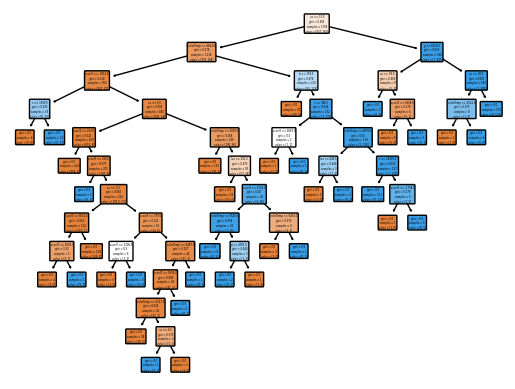

In [15]:
dTree = DecisionTreeClassifier(random_state = 512)

dTree.fit(x_train, y_train)

test_score = dTree.score(x_test, y_test)
train_score = dTree.score(x_train, y_train)
# print(f"A Decision Tree classifier running on the breast cancer dataset from sklearn gives a probility of{test_score * 100: .3f}% on the training data and a probability of{train_score * 100: .3f}%.")

test_predictions = dTree.predict(x_test)
train_predictions = dTree.predict(x_train)

name = "Decision Tree"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)


# plt.figure(figsize=(15, 7.5))
plot_tree(dTree, filled=True, rounded = True, feature_names=X.columns.tolist())



In [21]:
import sys
!{sys.executable} -m pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

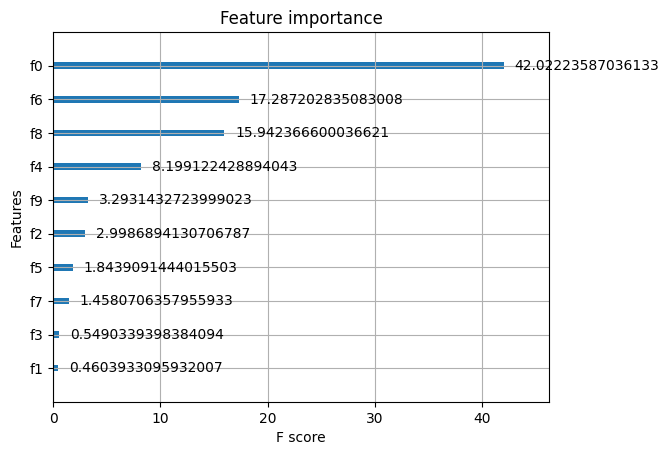

In [16]:

from xgboost import XGBClassifier, plot_importance



xgbClassifier = XGBClassifier(random_state = 42)
fit = xgbClassifier.fit(x_train.to_numpy(), y_train.to_numpy()) # looking up in xgboost docs, it can't be a pandas dataframe, but can be a numpy array.
xgbClassifier.base_score = 0
test_score = xgbClassifier.score(x_test, y_test)
train_score = xgbClassifier.score(x_train, y_train)




test_predictions = xgbClassifier.predict(x_test)
train_predictions = xgbClassifier.predict(x_train)


name = "XGBoost"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)

plot_importance(fit,  importance_type = 'gain')



In [17]:
bagging = BaggingClassifier(random_state = 512)
bagging.fit(x_train, y_train)

test_score = bagging.score(x_test, y_test)
train_score = bagging.score(x_train, y_train)




test_predictions = bagging.predict(x_test)
train_predictions = bagging.predict(x_train)

name = "Bagging"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)

In [18]:
adaboost = AdaBoostClassifier(random_state=512)
adaboost.fit(x_train, y_train)

test_score = adaboost.score(x_test, y_test)
train_score = adaboost.score(x_train, y_train)

test_predictions = adaboost.predict(x_test)
train_predictions = adaboost.predict(x_train)

name = "Adaboost"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)


c:\Users\lucia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [19]:
random_forest = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
random_forest.fit(x_train, y_train)

test_score = random_forest.score(x_test, y_test)
train_score = random_forest.score(x_train, y_train)






test_predictions = random_forest.predict(x_test)
train_predictions = random_forest.predict(x_train)

name = "Random Forest"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)

In [20]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

test_score = naive_bayes.score(x_test, y_test)
train_score = naive_bayes.score(x_train, y_train)






test_predictions = naive_bayes.predict(x_test)
train_predictions = naive_bayes.predict(x_train)

name = "Naive Bayes"
set_accuracies(name, train_score, test_score)
set_precisions_recall_f_score(y_test, test_predictions, y_train, train_predictions, name)

# Benchmarks
Comparing tables that compare the Accuracy, Precision and Recall of the different models.

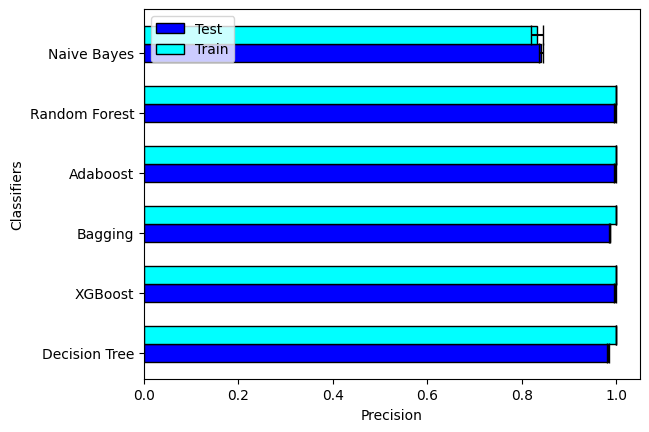

{'Test': {'Decision Tree': array([0.98125   , 0.98393574]), 'XGBoost': array([1.        , 0.99603175]), 'Bagging': array([0.98742138, 0.98406375]), 'Adaboost': array([1.        , 0.99603175]), 'Random Forest': array([1.        , 0.99603175]), 'Naive Bayes': array([0.83679525, 0.84482759])}, 'Train': {'Decision Tree': array([1., 1.]), 'XGBoost': array([1., 1.]), 'Bagging': array([0.9989339, 1.       ]), 'Adaboost': array([1., 1.]), 'Random Forest': array([1., 1.]), 'Naive Bayes': array([0.81934847, 0.84559885])}}


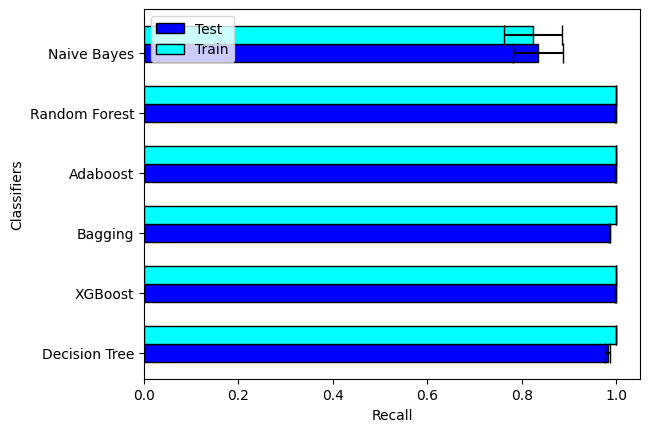

{'Test': {'Decision Tree': array([0.98742138, 0.97609562]), 'XGBoost': array([0.99685535, 1.        ]), 'Bagging': array([0.98742138, 0.98406375]), 'Adaboost': array([0.99685535, 1.        ]), 'Random Forest': array([0.99685535, 1.        ]), 'Naive Bayes': array([0.88679245, 0.78087649])}, 'Train': {'Decision Tree': array([1., 1.]), 'XGBoost': array([1., 1.]), 'Bagging': array([1.        , 0.99869961]), 'Adaboost': array([1., 1.]), 'Random Forest': array([1., 1.]), 'Naive Bayes': array([0.88580576, 0.76202861])}}


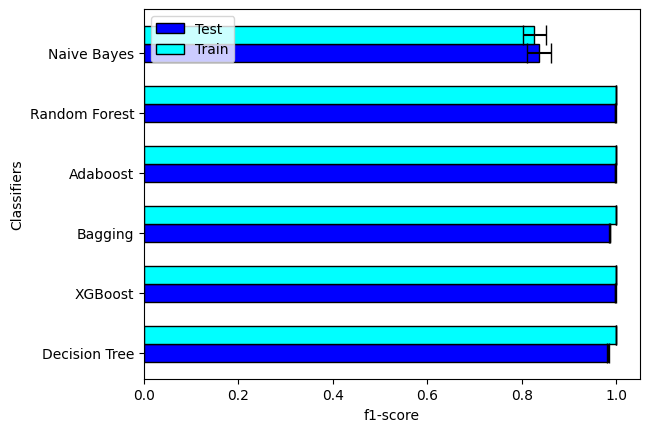

{'Test': {'Decision Tree': array([0.98432602, 0.98      ]), 'XGBoost': array([0.9984252 , 0.99801193]), 'Bagging': array([0.98742138, 0.98406375]), 'Adaboost': array([0.9984252 , 0.99801193]), 'Random Forest': array([0.9984252 , 0.99801193]), 'Naive Bayes': array([0.8610687, 0.8115942])}, 'Train': {'Decision Tree': array([1., 1.]), 'XGBoost': array([1., 1.]), 'Bagging': array([0.99946667, 0.99934938]), 'Adaboost': array([1., 1.]), 'Random Forest': array([1., 1.]), 'Naive Bayes': array([0.85128205, 0.80164159])}}


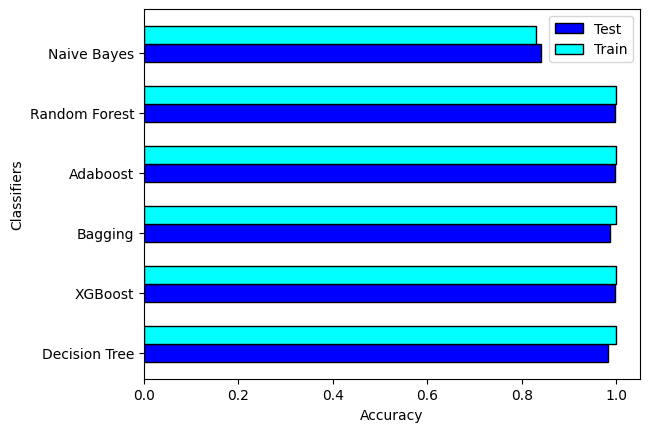

{'Test': {'Decision Tree': 0.9824253075571178, 'XGBoost': 0.9982425307557118, 'Bagging': 0.9859402460456942, 'Adaboost': 0.9982425307557118, 'Random Forest': 0.9982425307557118, 'Naive Bayes': 0.8400702987697716}, 'Train': {'Decision Tree': 1.0, 'XGBoost': 1.0, 'Bagging': 0.9994138335287222, 'Adaboost': 1.0, 'Random Forest': 1.0, 'Naive Bayes': 0.8300117233294255}}


In [21]:
def draw_table_w_conf_int(data, statistic):
    bar_width = 0.3

    classifiers = list(data["Test"].keys())
    test_results = list(data["Test"].values())
    train_results = list(data["Train"].values())
    test_exp = []
    test_err = []
    for test_result in test_results:
        test_exp.append(test_result[0] + (test_result[1] - test_result[0]) / 2)
        test_err.append(abs(test_result[1] - test_result[0]) / 2)

    train_exp = []
    train_err = []
    for train_result in train_results:
        train_exp.append(train_result[0] + (train_result[1] - train_result[0]) / 2)
        train_err.append(abs(train_result[1] - train_result[0]) / 2)
    
    r1 = np.arange(len(test_exp))
    r2 = [x + bar_width for x in r1]

    plt.barh(r1, test_exp, height = bar_width, color = 'blue', edgecolor = 'black', xerr=test_err, capsize=7, label="Test")

    plt.barh(r2, train_exp, height = bar_width, color = 'cyan', edgecolor = 'black', xerr=train_err, capsize=7, label='Train')

    plt.yticks([r for r in range(len(test_exp))], classifiers)

    plt.xlabel(f"{statistic}")
    plt.ylabel('Classifiers')

    plt.legend()
    plt.show()


def draw_table(data, statistic):
    bar_width = 0.3

    classifiers = list(data["Test"].keys())
    test_results = list(data["Test"].values())
    train_results = list(data["Train"].values())

    
    r1 = np.arange(len(classifiers))
    r2 = [x + bar_width for x in r1]

    plt.barh(r1, test_results, height = bar_width, color = 'blue', edgecolor = 'black', capsize=7, label="Test")

    plt.barh(r2, train_results, height = bar_width, color = 'cyan', edgecolor = 'black', capsize=7, label='Train')

    plt.yticks([r for r in range(len(classifiers))], classifiers)

    plt.xlabel(f"{statistic}")
    plt.ylabel('Classifiers')

    plt.legend()
    plt.show()

    """
    classifiers = list(data.keys())
    results = list(data.values())
    print(classifiers, results)

    fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.barh(classifiers, results, color ="navy")
    
    
    plt.ylabel("Classifier")
    plt.title(f"Comparing 1 - (The {statistic}) With Each Classifier For {datatype} Data")
    plt.show()"""

draw_table_w_conf_int(precisions, "Precision")
print(precisions)

draw_table_w_conf_int(recall, "Recall")
print(recall)

draw_table_w_conf_int(f_score, "f1-score")
print(f_score)

draw_table(accuracies, "Accuracy")
print(accuracies)





    

## ROC Curve

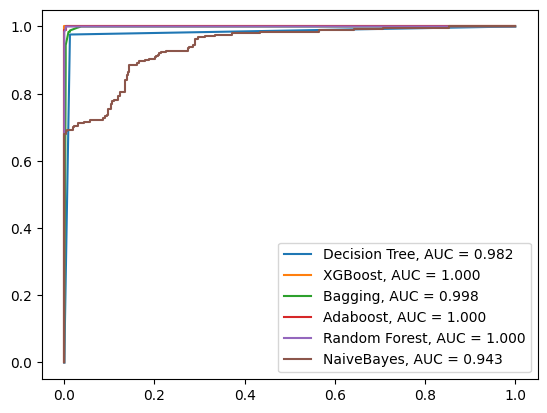

In [22]:
plt.figure(0).clf()

classifiers = {
    "Decision Tree": dTree,
    "XGBoost": xgbClassifier,
    "Bagging": bagging,
    "Adaboost": adaboost,
    "Random Forest": random_forest,
    "NaiveBayes": naive_bayes
}

for name, classifier in classifiers.items():
    y_pred_probs = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    auc = roc_auc_score(y_test, y_pred_probs)
    plt.plot(fpr, tpr, label = f"{name}, AUC = {auc:.3f}")


plt.legend()

In [25]:
# m2cgen

dart_model = []

# naive_bayes_dart = m2c.export_to_dart(naive_bayes)
# random_forest_dart = m2c.export_to_dart(random_forest)
# xgbClassifier_dart = m2c.export_to_dart(xgbClassifier)
# adaboost_dart = m2c.export_to_dart(adaboost)

# with open('random_forest.dart', 'w') as f:
#     code = m2c.export_to_dart(random_forest)
#     f.write(code)
with open('xgboost-20240507.dart', 'w') as f:
    code = m2c.export_to_dart(xgbClassifier)
    f.write(code)
# with open('xgboost.py', 'w') as f:
#     code = m2c.export_to_python(xgbClassifier)
#     f.write(code)
# with open('decision_tree.dart', 'w') as f:
#     code = m2c.export_to_dart(dTree)
#     f.write(code)
# import pickle



# with open('xgboost.pkl', 'wb') as file:

#     pickle.dump(xgbClassifier, file )



# joblib.dump(xgbClassifier, "xgboost_model.pkl")

In [13]:
# joblib.dump(x_train.columns, 'column_order.txt')